## GENERACION GROUND TRUE

### Dataset Shanghai Tech

In [ ]:
import os
import json
from GT_functions import *

#Definimos la ruta del dataset
root = r'C:\Users\Usuario\Pictures\Bases de Datos\Shanghai Tech'
part_A_train = os.path.join(root,'part_A_final/train_data','images')

##### TRAIN

In [ ]:
#PART A
part_A_train = os.path.join(root,'part_A_final/train_data','images')
GT_generation(ls_paths(part_A_train))
#PART B
part_B_train = os.path.join(root,'part_B_final/train_data','images')
GT_generation(ls_paths(part_B_train))


##### TEST

In [ ]:
#PART A
part_A_test = os.path.join(root,'part_A_final/test_data','images')
GT_generation(ls_paths(part_A_test))
#PART B
part_B_test = os.path.join(root,'part_B_final/test_data','images')
GT_generation(ls_paths(part_B_test))

# MAKE DATASET GREAT AGAIN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from load_data import*

root = r'C:\Users\Usuario\Pictures\Bases de Datos\Shanghai Tech'
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')

train = Load_Data(part_A_train)
test = Load_Data(part_A_test)

with h5py.File('data.h5', 'w') as hf:
    hf['train'] =  train
    hf['test'] =  test

## EXPLORACION RESULTADOS

In [1]:
from load_data import *
from plotting import *
import h5py

data_root = r"C:\Users\Usuario\Pictures\Bases de Datos\Shanghai Tech\part_A_final\data.h5"
predict_root = r"C:\Users\Usuario\Pictures\Bases de Datos\Shanghai Tech\part_A_final\results\v5.0.1.h5"

f = h5py.File(data_root, 'r')
train = tf.constant(np.asarray(f['train']))
test = tf.constant(np.asarray(f['test']))
f.close


pred = h5py.File(predict_root, 'r')
train_pred = tf.constant(np.asarray(pred['train']))
test_pred = tf.constant(np.asarray(pred['test']))
pred.close

<bound method File.close of <HDF5 file "v5.0.1.h5" (mode r)>>

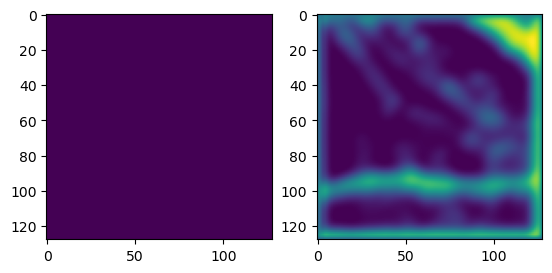

In [27]:
import matplotlib.pyplot as plt

A = train[0,:,:,1]
B = train_pred[0,:,:,0]

plt.figure()
plt.subplot(1, 2, 1), plt.imshow(A)
plt.subplot(1, 2, 2), plt.imshow(B)

plt.show()

In [3]:
count_estimate(train[:,:,:,0:1], train[:,:,:,1:2], train_pred, 'v5.0.1', 'train')
count_estimate(test[:,:,:,0:1], test[:,:,:,1:2], test_pred,'v5.0.1', 'test')